https://www.youtube.com/watch?v=ujId4ipkBio&t=687s

https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

In [7]:
from google.colab import files
uploaded =files.upload()

In [8]:
import pandas as pd
import numpy as np

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [9]:
tdf= pd.read_csv('combined_data.csv')
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [10]:
tdf

Output hidden; open in https://colab.research.google.com to view.

In [27]:
#i will create a sample data to have faster runtime etc and make it easier for me.


df_s=tdf.copy()

#df_s = tdf.loc[0:120,:]
df_s=tdf.drop('index',axis=1)

df_s=df_s.dropna()

df_s.isnull().sum()

Content    0
Time       0
dtype: int64

In [28]:
#Cleaning the tweets

def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+' , '', text) #remove the @mentions
  text = re.sub('https?:\/\/\S+' , '', text) #remove the hyperlinks
  text = re.sub(r'#', '', text) #removing #tags
  text = re.sub(r'RT[\s]+', '', text) #removing RT(ReTweets)

  return text

In [29]:
df_s['Content'] = df_s['Content'].apply(cleanTxt)

The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

Polarity is a float which lies between the ranges of [-1.0,1.0].
-1 defines a negative sentiment
1 defines a positive sentiment.
Subjectivity lies between [0.0,1.0].
0.0 is very objective and 1.0 is very subjective.
If subjectivity < 0.5, the sentence is more subjective than objective and vice versa.

In [30]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create 2 new columns
df_s['Subjectivity'] = df_s['Content'].apply(getSubjectivity)
df_s['Polarity'] = df_s['Content'].apply(getPolarity)

df_s.head()

,Content,Time,Subjectivity,Polarity
0,"Little do they know, birds aren't real!",2022-03-11 19:41:00,0.400000,0.031250
1,What if one atom at a time in your body was s...,2022-03-11 00:31:00,0.434848,0.170455
2,This weekend,2022-03-10 05:44:00,0.000000,0.000000
3,You're welcome. We have also sent power adap...,2022-03-09 21:49:00,0.650000,0.300000
4,"Optimized, fully-reusable Starship is ~150t ...",2022-03-09 21:41:00,0.125000,0.000000


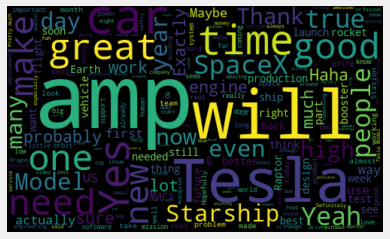

In [31]:
#Plot Word Cloud
allWords = ''.join([twts for twts in df_s['Content']])
wordCloud = WordCloud(width=500, height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
#create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  elif score > 0:
    return 'Positive'

def getSignal(analysis):
  if analysis == 'Negative':
    return -1
  elif analysis == 'Neutral':
    return 0
  elif analysis == 'Positive':
    return 1

df_s['Analysis'] = df_s['Polarity'].apply(getAnalysis)
df_s['Signal']= df_s['Analysis'].apply(getSignal)

df_s


Output hidden; open in https://colab.research.google.com to view.

In [34]:
#Print all positive tweets
j=1
sortedDF = df_s.sort_values(by=['Polarity']) #sorts the df by polarity

for i in range(0, sortedDF.shape[0]):   #number of row in our df
  if (sortedDF['Analysis'][i]== 'Positive'):          #if sorted  analysis at position 1 is positive
    print(str(j) + sortedDF['Content'][i] +' '+ '1')
    print()
    j=j+1
  elif (sortedDF['Analysis'][i]== 'Negative'):
    print(str(j) + sortedDF['Content'][i] +' '+ '-1')
    print()
    j=j+1
  elif (sortedDF['Analysis'][i]== 'Neutral'):
    print(str(j) + sortedDF['Content'][i] +' '+ '0')
    print()
    j=j+1

1 Little do they know, birds aren't real!  1

2 What if one atom at a time in your body was switched out for another atom? There would be you with all new atoms and another you with the original atoms - Human of Theseus. 1

3   This weekend 0

4  You're welcome. We have also sent power adapters for car cigarette lighters, solar/battery packs and generators for places where electricity is not available. 1

5  Optimized, fully-reusable Starship is ~150t to same reference orbit as Saturn V. In expendable mode, Starship payload would be 250t to 300t. 0

6  In our experience, COPV gain/pain flattens out above 6000 psi and is &lt;1 above 10,000 psi, unless volume constrained like Dragon.   Heating from pressurization &amp; cooling from depressurization also become major problems at very high pressure. 1

7  There is no direct evidence of that ad being run, but that does sum up the sales pitch. It is mind-blowing that he &amp; his crew *rowed* to a whaling station from the Antarctic! -1

8 Ve

KeyError: ignored

In [36]:
#Set time as index. We can later use the acsending as per need

from datetime import datetime

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d


df_s['Time']=pd.to_datetime(df_s['Time'], format=fmt)

df_s = df_s.set_index(df_s['Time'])
df_s = df_s.sort_index(ascending=True)
#df_s = df_s.drop('index', axis=1)
df_s

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 193, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 169, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 5799, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4414, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert Time, already exists


,Content,Time,Subjectivity,Polarity,Analysis,Signal
Time,,,,,,
2017-06-19 09:32:00,Elon Musk posted a video on Twitter from the p...,2017-06-19 09:32:00,0.000000,0.000000,Neutral,0
2017-12-02 19:33:00,I love the thought of a car drifting apparent...,2017-12-02 19:33:00,0.556250,0.031250,Positive,1
2017-12-02 22:46:00,Asimov's Foundation books should def be part ...,2017-12-02 22:46:00,0.900000,0.600000,Positive,1
2017-12-03 00:01:00,That's certainly the right way to go to store...,2017-12-03 00:01:00,0.626786,0.112500,Positive,1
2017-12-03 19:05:00,To preserve the transcendent majesty &amp; spe...,2017-12-03 19:05:00,1.000000,-1.000000,Negative,-1
...,...,...,...,...,...,...
2022-03-09 21:41:00,"Optimized, fully-reusable Starship is ~150t ...",2022-03-09 21:41:00,0.125000,0.000000,Neutral,0
2022-03-09 21:49:00,You're welcome. We have also sent power adap...,2022-03-09 21:49:00,0.650000,0.300000,Positive,1
2022-03-10 05:44:00,This weekend,2022-03-10 05:44:00,0.000000,0.000000,Neutral,0


In [37]:
# if the tweet is between 9-17 sum up the subjectivtity/polarity and establish the signal
#if the tweet is between 17-9 sum up and establish a signal 

In [39]:
time_column = df_s['Time']
one_day = []


In [40]:
print(df_s['2022-03-06']['Analysis'])


Time
2022-03-06 03:45:00     Neutral
2022-03-06 04:36:00    Positive
2022-03-06 04:38:00    Positive
2022-03-06 04:44:00    Positive
2022-03-06 05:02:00     Neutral
2022-03-06 05:27:00     Neutral
2022-03-06 12:15:00    Positive
2022-03-06 13:46:00     Neutral
2022-03-06 13:51:00     Neutral
2022-03-06 13:55:00    Negative
2022-03-06 13:57:00    Positive
2022-03-06 13:59:00    Positive
2022-03-06 14:06:00    Positive
2022-03-06 14:10:00     Neutral
2022-03-06 14:13:00     Neutral
2022-03-06 14:18:00    Negative
2022-03-06 14:19:00     Neutral
2022-03-06 23:27:00     Neutral
2022-03-06 23:33:00    Positive
2022-03-06 23:57:00    Positive
2022-03-06 23:59:00     Neutral
Name: Analysis, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [41]:
#how to get mean of the signal on each day in df

signal_day=df_s['Signal'].resample('D').mean()
print(signal_day['2022-03-06'])


#starting from 8:59:59 morning to 17:00:01 same day
#starting from 17:00:03 to 8:59:59 next day 


signal_day=df_s['Signal'].resample('H').mean()
print(signal_day['2022-03-06 08:59:59' : '2022-03-06 17:00:01'])
print(signal_day['2022-03-06 17:00:02' : '2022-03-07 08:59:58'])
print(signal_day['2022-03-07 08:59:59' : '2022-03-07 17:00:01'])
print(signal_day['2022-03-07 17:00:02' : '2022-03-08 08:59:58'])

 #play with the date and it will give you the signals you need

0.3333333333333333
Time
2022-03-06 09:00:00    NaN
2022-03-06 10:00:00    NaN
2022-03-06 11:00:00    NaN
2022-03-06 12:00:00    1.0
2022-03-06 13:00:00    0.2
2022-03-06 14:00:00    0.0
2022-03-06 15:00:00    NaN
2022-03-06 16:00:00    NaN
2022-03-06 17:00:00    NaN
Freq: H, Name: Signal, dtype: float64
Time
2022-03-06 18:00:00    NaN
2022-03-06 19:00:00    NaN
2022-03-06 20:00:00    NaN
2022-03-06 21:00:00    NaN
2022-03-06 22:00:00    NaN
2022-03-06 23:00:00    0.5
2022-03-07 00:00:00    0.0
2022-03-07 01:00:00    NaN
2022-03-07 02:00:00    NaN
2022-03-07 03:00:00    NaN
2022-03-07 04:00:00    NaN
2022-03-07 05:00:00    NaN
2022-03-07 06:00:00    NaN
2022-03-07 07:00:00    0.5
2022-03-07 08:00:00    NaN
Freq: H, Name: Signal, dtype: float64
Time
2022-03-07 09:00:00   NaN
2022-03-07 10:00:00   NaN
2022-03-07 11:00:00   NaN
2022-03-07 12:00:00   NaN
2022-03-07 13:00:00   NaN
2022-03-07 14:00:00   NaN
2022-03-07 15:00:00   NaN
2022-03-07 16:00:00   NaN
2022-03-07 17:00:00   NaN
Freq: H,